In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from tld import get_tld, is_tld
from urllib.parse import urlparse
import re
import string

In [19]:
data = pd.read_csv(r"C:\Users\S Sri Hari\OneDrive\Desktop\datascience\archive (1)\malicious_phish.csv")

In [20]:
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [22]:
data["type"].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [23]:
class_dist = data["type"].value_counts()

<Axes: xlabel='type'>

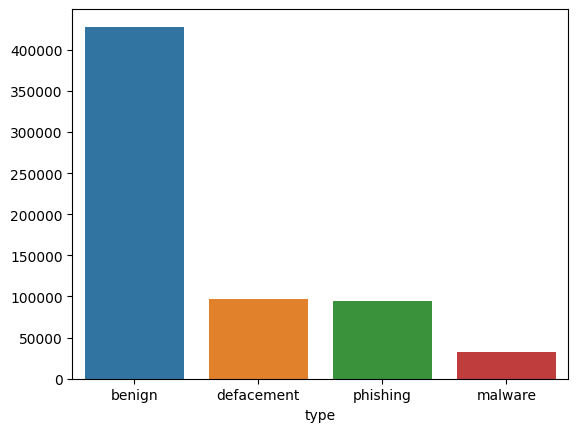

In [24]:
sns.barplot(x=class_dist.index, y = class_dist.values)

In [25]:
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [26]:
# remove www. from the url
data['url'] = data['url'].replace('www.', '', regex=True)

# add class column
rem = {"Class": {"benign": 0, "defacement": 1, "phishing": 1, "malware":1}}
data['Class'] = data["type"]
data = data.replace(rem)

C:\Users\S Sri Hari\AppData\Local\Temp\ipykernel_25312\1838422671.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(rem)


In [27]:
data

,url,type,Class
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1
651188,gamespot.com/xbox360/action/deadspace/,phishing,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1


In [28]:
def pri_domain(url):
    
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except:
        pri_domain = None

    return pri_domain

def abnormal_url(url):
    hostname = str(urlparse(url).hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0

def httpSecure(url):
    htp = urlparse(url).scheme
    if str(htp)=='https':
        return 1
    else:
        return 0

def digit_count(url):
    digits = 0
    for ch in url:
        if ch.isnumeric():
            digits = digits + 1
    return digits

def special_count(url):
    special_chars = set(string.punctuation)
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

def letter_count(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def URL_Shortening(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
def having_ip(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    
# feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
# for a in feature:
#     data[a] = data['url'].apply(lambda i: i.count(a))
    
# data['pri_domain'] = data['url'].apply(lambda x: pri_domain(x))
# data['abnormal_url'] = data['url'].apply(lambda x: abnormal_url(x))
# data['httpSecure'] = data['url'].apply(lambda x: httpSecure(x))
# data['digits'] = data['url'].apply(lambda x: digit_count(x))
# data['special_chars'] = data['url'].apply(lambda x: special_count(x))
# data['letter_count'] = data['url'].apply(lambda x: letter_count(x))
# data['url_shortend'] = data['url'].apply(lambda x: URL_Shortening(x))
# data['have_ip'] = data['url'].apply(lambda x : having_ip(x))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# predict = model.predict(X_test)
# score = accuracy_score(predict, y_test)

In [30]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))
    
data['pri_domain'] = data['url'].apply(lambda x: pri_domain(x))
data['abnormal_url'] = data['url'].apply(lambda x: abnormal_url(x))
data['httpSecure'] = data['url'].apply(lambda x: httpSecure(x))
data['digits'] = data['url'].apply(lambda x: digit_count(x))
data['special_chars'] = data['url'].apply(lambda x: special_count(x))
data['letter_count'] = data['url'].apply(lambda x: letter_count(x))
data['url_shortend'] = data['url'].apply(lambda x: URL_Shortening(x))
data['have_ip'] = data['url'].apply(lambda x : having_ip(x))

<Axes: xlabel='abnormal_url', ylabel='count'>

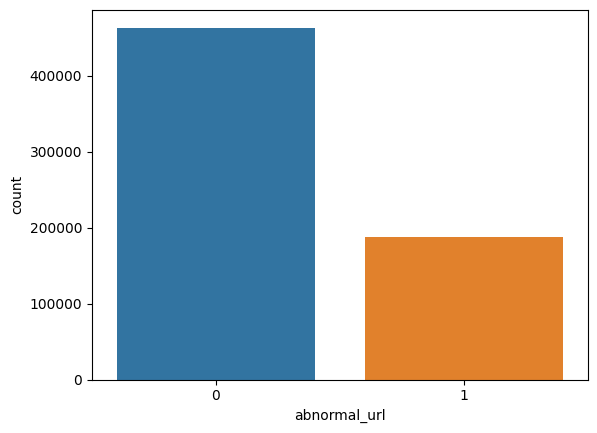

In [31]:
sns.countplot(x='abnormal_url', data=data)

<Axes: xlabel='httpSecure', ylabel='count'>

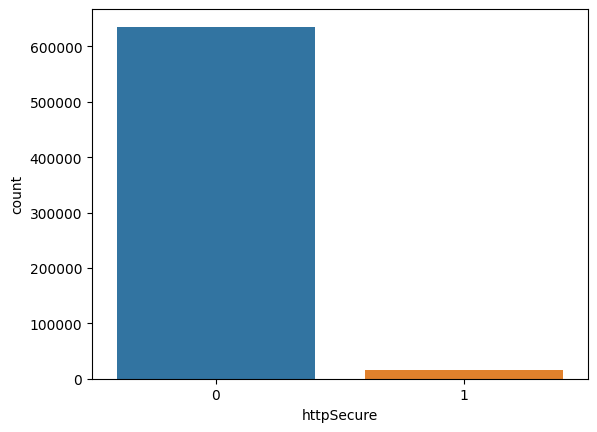

In [32]:
sns.countplot(x='httpSecure', data=data)

<Axes: xlabel='url_shortend', ylabel='count'>

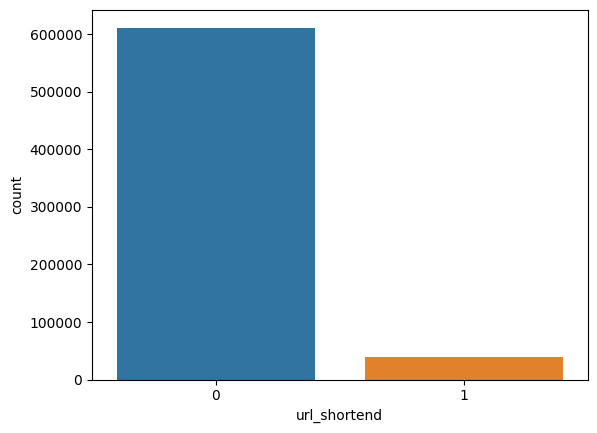

In [33]:
sns.countplot(x='url_shortend', data=data)

<Axes: xlabel='have_ip', ylabel='count'>

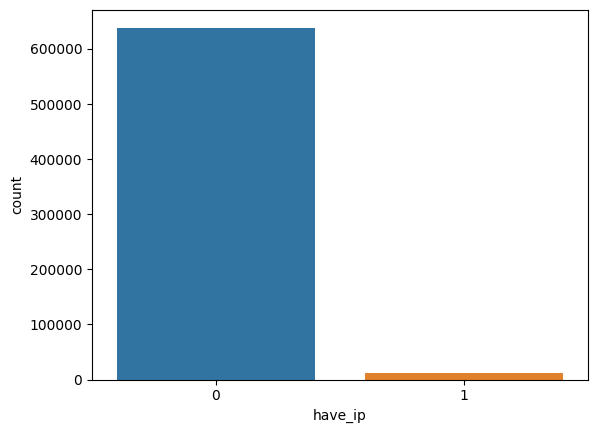

In [34]:
sns.countplot(x='have_ip', data=data)

In [35]:
X = data.drop(['url', 'type', 'Class', 'pri_domain'], axis=1)

In [36]:
y = data["Class"]

In [37]:
X

,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,httpSecure,digits,special_chars,letter_count,url_shortend,have_ip
0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,3,13,0,0
1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,29,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,25,0,0
3,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,7,17,60,0,0
4,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22,14,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,12,6,21,0,0
651187,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,7,8,29,1,0
651188,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,5,30,1,0
651189,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,9,36,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
data

,url,type,Class,@,?,-,=,.,#,%,...,",",//,pri_domain,abnormal_url,httpSecure,digits,special_chars,letter_count,url_shortend,have_ip
0,br-icloud.com.br,phishing,1,0,0,1,0,2,0,0,...,0,0,br-icloud.com.br,0,0,0,3,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,0,0,2,0,0,...,0,0,mp3raid.com,0,0,1,5,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,0,0,2,0,0,...,0,0,bopsecrets.org,0,0,1,5,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,0,1,1,4,2,0,0,...,0,1,garage-pirenne.be,1,0,7,17,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,1,1,3,2,0,0,...,0,1,adventure-nicaragua.net,1,0,22,14,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1,0,0,0,0,3,0,0,...,0,0,xbox360.ign.com,0,0,12,6,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1,0,0,2,0,2,0,0,...,0,0,games.teamxbox.com,0,0,7,8,29,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,1,0,0,0,0,1,0,0,...,0,0,gamespot.com,0,0,3,5,30,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1,0,0,0,0,2,0,0,...,0,0,en.wikipedia.org,0,0,0,9,36,0,0


In [40]:
plt.figure(figsize=(5, 4))
f1_scores = []
def train_model(model_list):
    for m in model_list:
        model = m['model']
        
        print("\nModel Name: \033[1m{} \033[0m \n".format(m['model_name']))
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        
        accuracy = accuracy_score(predict, y_test)
        precision = precision_score(y_test, predict, average='weighted')
        recall = recall_score(y_test, predict, average='weighted')
        f1score = f1_score(y_test, predict, average='weighted')
        
        print("Evaluation Scores\n")
        print("Precision:\033[32m \033[1m {:.3f} \033[0m \033[0m".format(precision))
        print("Recall:\033[32m \033[1m {:.3f} \033[0m \033[0m".format(recall))
        print("Accuracy:\033[32m \033[1m {:.3f} \033[0m \033[0m".format(accuracy))
        print("F1score:\033[32m \033[1m {:.3f} \033[0m \033[0m".format(f1score))      
        
        print("\n\033[1mModel Confusion Matrix \033[0m \n")
        
        cm = confusion_matrix(y_test, predict)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap="viridis", 
            xticklabels=['Benign', 'Malicious'],
            yticklabels=['Benign', 'Malicious'])
        plt.show()
        
        f1_scores.append(f1score)
        
        print("#"*70)

<Figure size 500x400 with 0 Axes>

In [41]:
model_list = [{'model_name' : m, 'model' : model} \
              for (m, model) in zip(['RandomForestClassifier', 'DecisionTreeClassifier', 'XGBClassifier', 'ExtraTreesClassifier'], \
                                    [RandomForestClassifier(), DecisionTreeClassifier(), xgb.XGBClassifier(), ExtraTreesClassifier()])]


Model Name: RandomForestClassifier  

Evaluation Scores

Precision:  0.933  
Recall:  0.932  
Accuracy:  0.932  
F1score:  0.931  

Model Confusion Matrix  



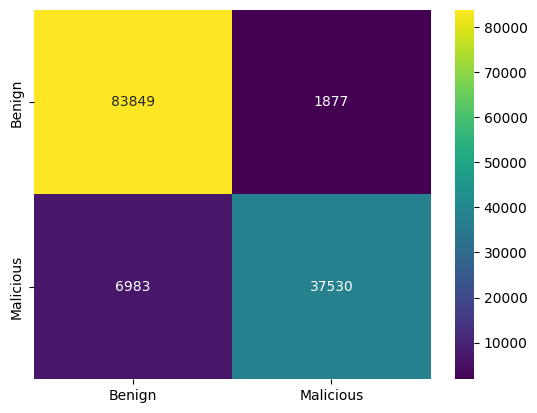

######################################################################

Model Name: DecisionTreeClassifier  

Evaluation Scores

Precision:  0.928  
Recall:  0.927  
Accuracy:  0.927  
F1score:  0.926  

Model Confusion Matrix  



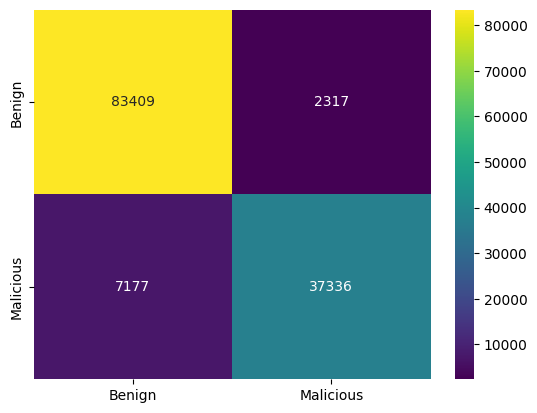

######################################################################

Model Name: XGBClassifier  

Evaluation Scores

Precision:  0.930  
Recall:  0.927  
Accuracy:  0.927  
F1score:  0.925  

Model Confusion Matrix  



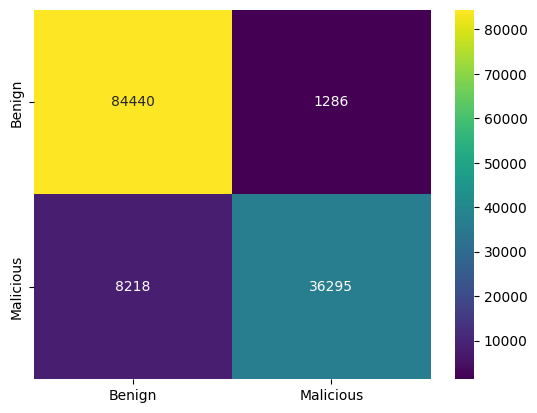

######################################################################

Model Name: ExtraTreesClassifier  

Evaluation Scores

Precision:  0.933  
Recall:  0.932  
Accuracy:  0.932  
F1score:  0.931  

Model Confusion Matrix  



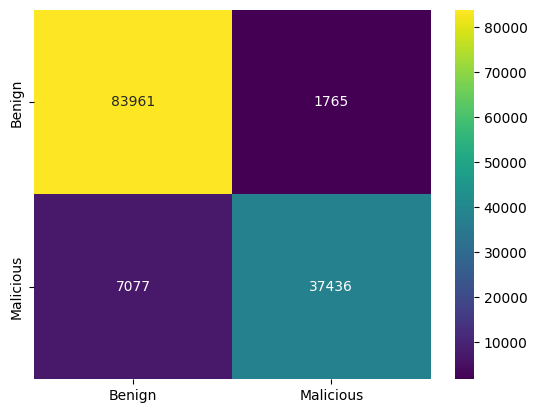

######################################################################


In [42]:
train_model(model_list)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

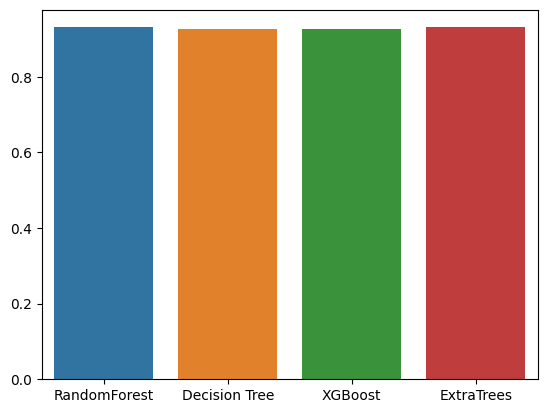

In [43]:
sns.barplot(x=["RandomForest", "Decision Tree", "XGBoost", "ExtraTrees"], y=f1_scores)

In [44]:
import pickle

# Create and train the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a file
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(model, file)


In [51]:

with open('random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [53]:


def create_features(url):
    features = []

    # Count occurrences of specific characters in the URL
    feature_characters = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']
    for char in feature_characters:
        features.append(url.count(char))

    # Check if the URL contains the hostname
    hostname = str(urlparse(url).hostname)
    match = re.search(hostname, url)
    features.append(1 if match else 0)

    # Check if the URL uses HTTPS
    scheme = urlparse(url).scheme
    features.append(1 if scheme == 'https' else 0)

    # Count the number of digits in the URL
    digits = sum(ch.isdigit() for ch in url)
    features.append(digits)

    # Count the number of special characters in the URL
    special_chars = sum(ch in string.punctuation for ch in url)
    features.append(special_chars)

    # Count the number of letters in the URL
    letters = sum(ch.isalpha() for ch in url)
    features.append(letters)

    # Check if the URL is shortened
    shortened_patterns = ['bit.ly', 'goo.gl', 'tinyurl', 'ow.ly', 't.co']
    shortened = any(pattern in url for pattern in shortened_patterns)
    features.append(1 if shortened else 0)

    # Check if the URL contains an IP address
    ip_pattern = r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b'
    contains_ip = bool(re.search(ip_pattern, url))
    features.append(1 if contains_ip else 0)

    return np.array(features).reshape(1, -1)


In [69]:
# Example URL for prediction
new_url = "bopsecrets.org/exroth/cr/1.html"

# Create features from the URL (assuming you have a function for feature extraction)
X_new = create_features(new_url)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_new)

# Display the predictions
print("Predicted class:", predictions)


Predicted class: [1]


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
